In [9]:
import pandas as pd

In [10]:
filtered_sentiment_roberta_twitter = pd.read_csv('analyzed_csv.csv')

positive_080_confidence = filtered_sentiment_roberta_twitter[(filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'] == 'positive') & (filtered_sentiment_roberta_twitter['sent_roberta_tweet_confidence'] > 0.8)]
negative_080_confidence = filtered_sentiment_roberta_twitter[(filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'] == 'negative') & (filtered_sentiment_roberta_twitter['sent_roberta_tweet_confidence'] > 0.8)]
positive_090_confidence = filtered_sentiment_roberta_twitter[(filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'] == 'positive') & (filtered_sentiment_roberta_twitter['sent_roberta_tweet_confidence'] > 0.9)]
negative_090_confidence = filtered_sentiment_roberta_twitter[(filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'] == 'negative') & (filtered_sentiment_roberta_twitter['sent_roberta_tweet_confidence'] > 0.9)]



results_roberta_filtered = {
    'positive': filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'].value_counts().get('positive'),
    'negative': filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'].value_counts().get('negative'),
    'neutral': filtered_sentiment_roberta_twitter['sent_roberta_tweet_class'].value_counts().get('neutral'),
    'pos_over_0.8': positive_080_confidence.shape[0],
    'neg_over_0.8': negative_080_confidence.shape[0],
    'pos_over_0.9': positive_090_confidence.shape[0],
    'neg_over_0.9': negative_090_confidence.shape[0],
}

print(results_roberta_filtered)

{'positive': 2120, 'negative': 1334, 'neutral': 1704, 'pos_over_0.8': 1175, 'neg_over_0.8': 402, 'pos_over_0.9': 669, 'neg_over_0.9': 155}


In [12]:
print(negative_090_confidence['original_text'][:10])

print(positive_090_confidence['original_text'][:10])

29       where are you going  why are you approaching...
120      Life could be worse.  No, not really.  This ...
121      Why are we so fucking shit?  This club has b...
130      Buy the train ticket.  What did you say?  Bu...
144      Life could be worse.  No, not really.  This ...
186      Where the fuck is my Coke Zero?  Did you dri...
191      I would never let a man spit in my mouth.  I...
207      I'm a puppet.  I'm a sheep.  I'm a cash cow....
237      What happened to your arm?  Oh, my God. Chea...
241      I never found you funny.  I never found you ...
Name: original_text, dtype: object
4        tea cakes where's the tea  I mean it seems l...
17       I will stand with you between the heavens an...
26       did you know  everything in British grocery ...
59       I just wanna let you know that you're doing ...
61       I decided to combine two of my favourite foo...
65       style the Adidas Forumbolds with me  I love ...
76       Who let Jamie Oliver cook?  Good morning. Ni

# Sentiment Analysis

## Results sentiment analysis Roberta-tweet on the filtered dataset

Out of 5158 transcripts
2120 transcripts were labelled as positive (41.1%).
1334 transcripts were labelled as negative (25.9%).
1704 transcripts were labelled as neutral (33.0%).

1175 of the 2120 (55.4%) positive transcripts were labelled with confidence over 0.8 (confidently positive)
669 of the 2120 (31.6%)  positive transcripts were labelled with confidence over 0.9 (very confidently positive)

402 of the 1334 (30.1%) negative transcripts were labelled with confidence over 0.8 (confidently negative)
155 of the 1334 (11.6%) negative transcripts were labelled with confidence over 0.9 (very confidently negative)


In [1]:
# print(negative_090_confidence['original_text'][:10])

In [2]:
# print(positive_090_confidence['original_text'][:10])

C:\Users\2mrwm\AppData\Local\Temp\ipykernel_27076\2761820760.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment', loc='bottom left')


ValueError: 'bottom left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

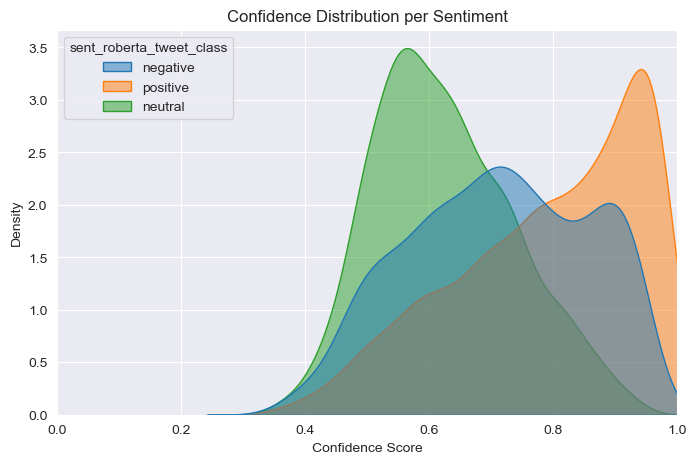

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
dual_topic_df = pd.read_csv('unfiltered_analyzed_csv.csv')
sent_df = dual_topic_df[['sent_roberta_tweet_class', 'sent_roberta_tweet_confidence']]

plt.figure(figsize=(8,5))
sns.kdeplot(data=dual_topic_df, x='sent_roberta_tweet_confidence', hue='sent_roberta_tweet_class', fill=True, common_norm=False, alpha=0.5)
plt.xlabel('Confidence Score')
plt.ylabel('Density')
plt.title('Confidence Distribution per Sentiment')
plt.xlim(0,1)
plt.legend(title='Sentiment', loc='bottom left')
plt.show()

# Topic Analysis

## Topic Analyis Roberta Tweet

In [14]:
# filtered_topic_roberta_twitter = pd.read_csv('filtered_df_topic_roberta_twitter.csv')
# class_col = filtered_topic_roberta_twitter['top_roberta_tweet_class']
# conf_col = filtered_topic_roberta_twitter['top_roberta_tweet_conf']
# 
# from collections import Counter
# 
# labels_counts = Counter(class_col)
# print(labels_counts)



Counter({"['diaries_&_daily_life']": 1371, '[]': 892, "['food_&_dining']": 599, "['music']": 306, "['fashion_&_style']": 290, "['relationships']": 288, "['family']": 238, "['film_tv_&_video']": 213, "['fitness_&_health']": 193, "['news_&_social_concern']": 168, "['sports']": 151, "['celebrity_&_pop_culture']": 130, "['business_&_entrepreneurs']": 73, "['travel_&_adventure']": 53, "['gaming']": 53, "['science_&_technology']": 51, "['learning_&_educational']": 49, "['arts_&_culture']": 39, "['other_hobbies']": 1})


C:\Users\2mrwm\AppData\Local\Temp\ipykernel_11608\1082554731.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_labels_counts, x='count', y='topic', palette='Blues_r', ax=axes[0])


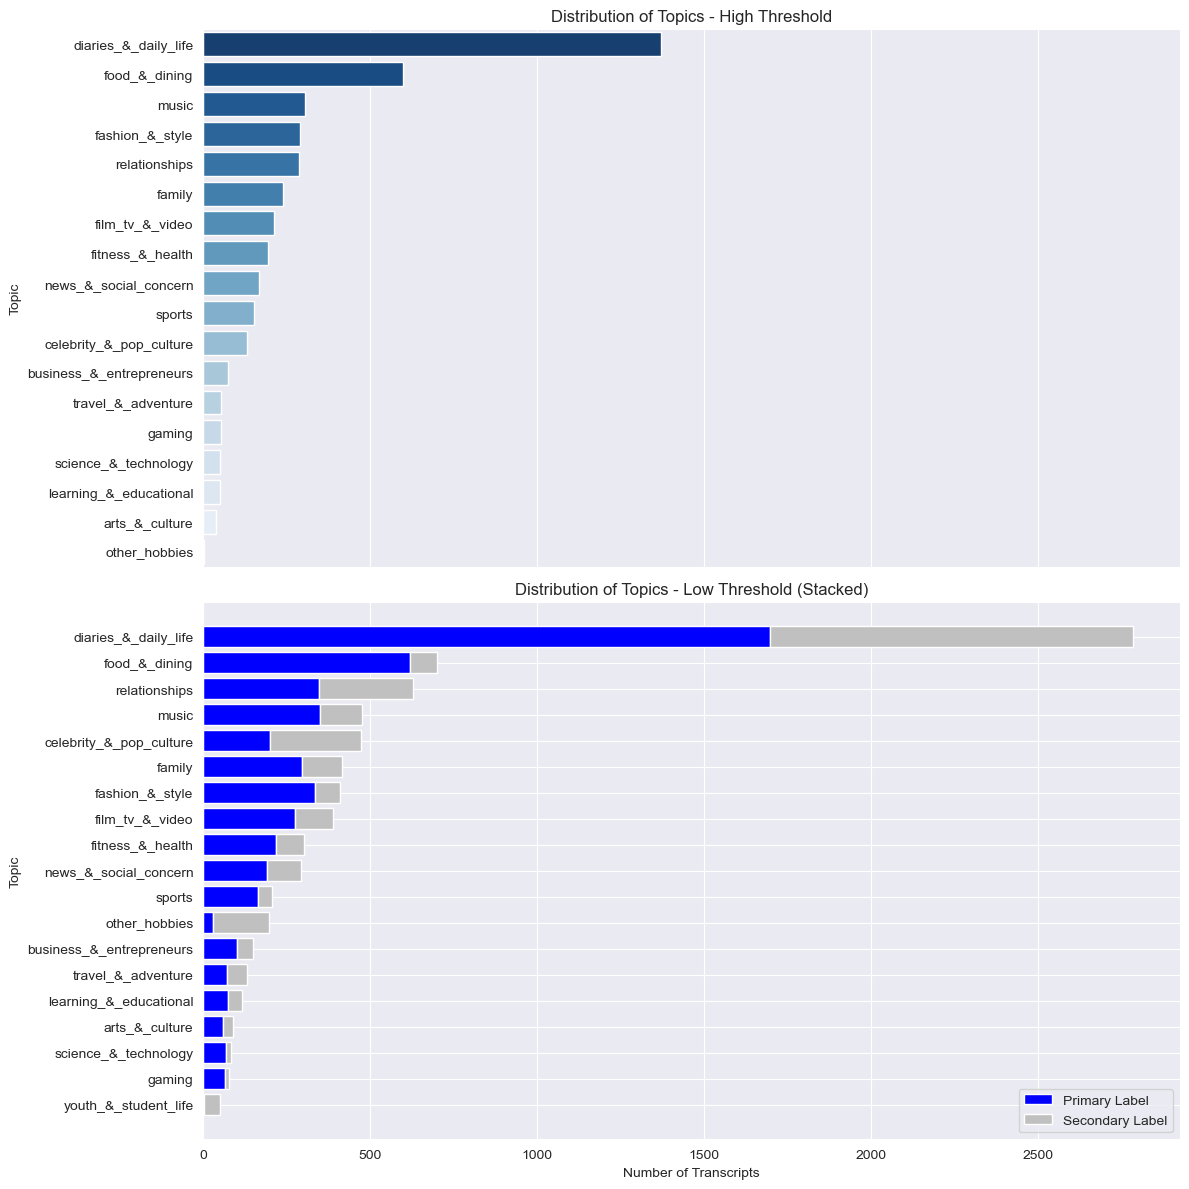

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

high_threshold_df = pd.read_csv('filtered_df_topic_roberta_twitter.csv')
dual_topic_df = pd.read_csv('analyzed_csv.csv')

class_col = high_threshold_df['top_roberta_tweet_class']
pure_labels = [label for sublist in class_col for label in eval(sublist)]
labels_counts = Counter(pure_labels)
df_labels_counts = pd.DataFrame(labels_counts.items(), columns=['topic', 'count']).sort_values(by='count', ascending=False)

low_threshold_primary = dual_topic_df['top_roberta_class1']
low_threshold_secondary = dual_topic_df['top_roberta_class2']

primary_counts = Counter(low_threshold_primary)
secondary_counts = Counter(low_threshold_secondary)

secondary_counts = Counter({k: v for k, v in secondary_counts.items() if not (isinstance(k, float) and math.isnan(k))})

df_primary = pd.DataFrame(primary_counts.items(), columns=['topic', 'primary_count']).sort_values(by='primary_count', ascending=False)
df_secondary = pd.DataFrame(secondary_counts.items(), columns=['topic', 'secondary_count']).sort_values(by='secondary_count', ascending=False)

df_combined = pd.merge(df_primary, df_secondary, on="topic", how="outer").fillna(0)
df_combined["topic"] = df_combined["topic"].astype(str)

df_combined["total_count"] = df_combined["primary_count"] + df_combined["secondary_count"]
df_combined = df_combined.sort_values(by="total_count", ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

sns.barplot(data=df_labels_counts, x='count', y='topic', palette='Blues_r', ax=axes[0])
axes[0].set_xlabel('Number of Transcripts')
axes[0].set_ylabel('Topic')
axes[0].set_title('Distribution of Topics - High Threshold')

topics = df_combined["topic"].tolist()[::-1]
primary_counts = df_combined["primary_count"].tolist()[::-1]
secondary_counts = df_combined["secondary_count"].tolist()[::-1]

axes[1].barh(topics, primary_counts, color="blue", label="Primary Label")
for i, count in enumerate(secondary_counts):
    if count > 0:
        axes[1].barh(topics[i], count, color="silver", left=primary_counts[i], label="Secondary Label" if i == 0 else "")

axes[1].set_xlabel("Number of Transcripts")
axes[1].set_ylabel("Topic")
axes[1].set_title("Distribution of Topics - Low Threshold (Stacked)")
axes[1].legend()

plt.tight_layout()
plt.show()

### Init results

Out of 5158 Transcripts: 

Diaries & Daily Life: 1371 (26.6%)
Not classified with enough confidence (<0.5): 892 (17.3%)
Food & Dining: 599 (11.6%)
Music: 306 (5.9%)
Fashion & Style: 290 (5.6%)
Relationships: 288 (5.6%)
Family: 238 (4.6%)
Film, Tv & Video: 213 (4.1%)
Fitness & Health: 193 (3.7%)
News & Social Concern: 168 (3.3%)
Sports: 151 (2.9%)
Celebrity & Pop Culture: 130 (2.5%)
Business & Entrepreneurs: 73 (1.4%)
Travel & Adventure: 53 (1.0%)
Gaming: 53 (1.0%)
Science & Technology: 51 (1.0%)
Learning & Educational: 49 (0.95%)
Arts & Culture: 39 (0.76%)
Other Hobbies: 1 (0.02%)

In [5]:
# import matplotlib.pyplot as plt
# labels = [
#     "Diaries & Daily Life", 
#     "Not classified with enough confidence (<0.5)", 
#     "Food & Dining", 
#     "Music", 
#     "Fashion & Style", 
#     "Relationships", 
#     "Family", 
#     "Film, Tv & Video", 
#     "Fitness & Health", 
#     "News & Social Concern", 
#     "Sports", 
#     "Celebrity & Pop Culture", 
#     "Business & Entrepreneurs", 
#     "Travel & Adventure", 
#     "Gaming", 
#     "Science & Technology", 
#     "Learning & Educational", 
#     "Arts & Culture", 
#     "Other Hobbies"
# ]
# sizes = [
#     26.6, 17.3, 11.6, 5.9, 5.6, 5.6, 4.6, 4.1, 
#     3.7, 3.3, 2.9, 2.5, 1.4, 1.0, 1.0, 1.0, 0.95, 0.76, 0.02
# ]
# 
# plt.figure(figsize=(10, 8))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# 
# plt.title('Topic Classification Distribution of Transcripts')
# plt.axis('equal')
# 
# plt.show()

check sentiment news and social concern, health
Meer inzoomen news and social concern
Zoek model voor reclame en niet reclame

# Sentiment for different topics

## Summary of main results

### Roberta Tweet


Out of 168 classified as **news & social concern**:
percentage of positive political transcripts: 7.14%
percentage of negative political transcripts: 54.17%
percentage of neutral political transcripts: 38.69%

percentage of confidently positive political transcripts (>0.8): 58%
percentage of very confidently positive political transcripts (>0.9): 42%
percentage of confidently negative political transcripts (>0.8): 27%
percentage of very confidently positive political transcripts (>0.9): 4%


Out of 193 classified as **fitness & health**
percentage of positive fitness and health transcripts: 35.12%
percentage of negative fitness and health transcripts: 32.14%
percentage of neutral fitness and health transcripts: 47.62%

percentage of confidently positive fitness transcripts (>0.8): 45.8%
percentage of very confidently positive fitness transcripts (>0.9): 25.4%
percentage of confidently negative fitness transcripts (>0.8): 16.7%
percentage of very confidently positive fitness transcripts (>0.9): 1.9%


In [2]:
import matplotlib.pyplot as plt
# roberta_full_df = pd.read_csv('analyzed_csv.csv')
# 
# all_topics = set()
# roberta_full_df['top_roberta_class1'].apply(lambda x: all_topics.update(eval(x)) if isinstance(x, str) else all_topics.update(x))
# sentiment_dict = {'topic': [], 'positive': [], 'negative': [], 'neutral': []}
# for topic in all_topics:
#     specific_topic_df = roberta_full_df[roberta_full_df['top_roberta_class1'].apply(lambda x: topic in x)]
#     total_count = len(specific_topic_df)
#     if total_count == 0:
#         continue
#         
#     sentiment_counts = specific_topic_df['top_roberta_class1'].value_counts()
#     
#     positive_percent = (sentiment_counts.get('positive', 0) / total_count) * 100
#     negative_percent = (sentiment_counts.get('negative', 0) / total_count) * 100
#     neutral_percent = (sentiment_counts.get('neutral', 0) / total_count) * 100
#     
#     sentiment_dict['topic'].append(topic)
#     sentiment_dict['positive'].append(positive_percent)
#     sentiment_dict['negative'].append(negative_percent)
#     sentiment_dict['neutral'].append(neutral_percent)
# 
# sentiment_df = pd.DataFrame(sentiment_dict)
# sentiment_df.set_index('topic', inplace=True)
# 
# print(sentiment_df.index)
# 
# sentiment_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,6))
# plt.title('Sentiment distribution per topic')
# plt.ylabel('Sentiment percentage')
# plt.xlabel('Topic', fontsize=12)
# plt.legend(title='Sentiment', labels=['Positive', 'Negative', 'Neutral'], fontsize=10, loc='upper right')
# plt.ylim(0, 100)
# plt.xticks(rotation=45, ha='right', fontsize=10)
# 
# plt.show()

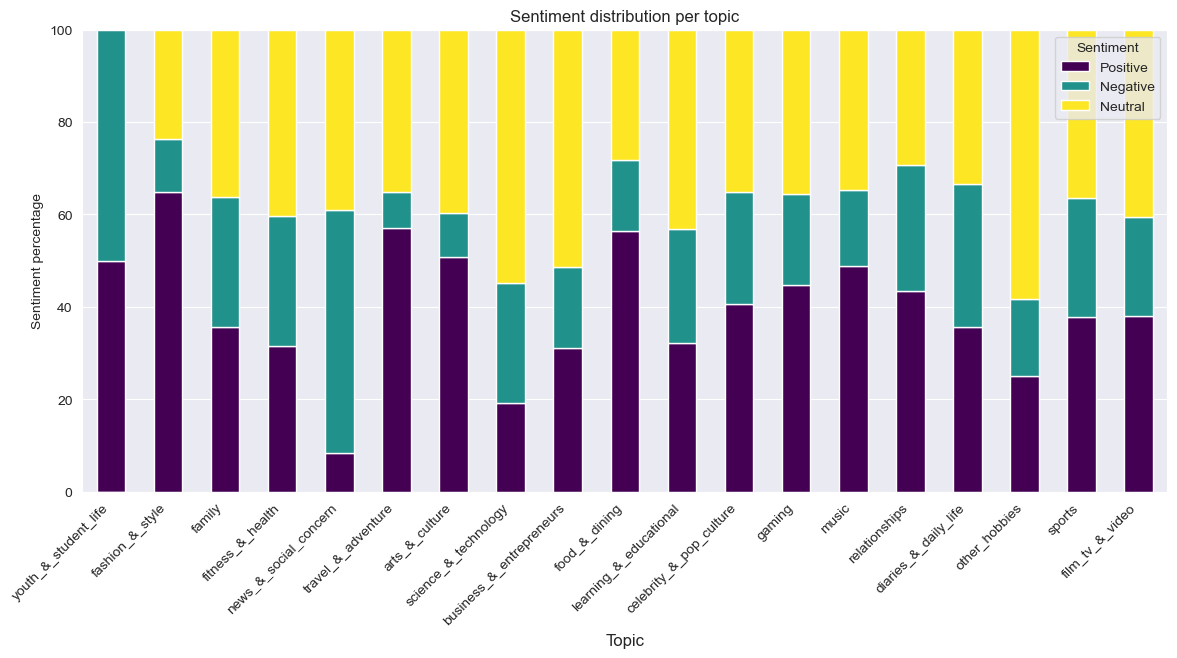

In [3]:
roberta_full_df = pd.read_csv('unfiltered_analyzed_csv.csv')

all_topics = set(roberta_full_df['top_roberta_class1'].dropna().unique())

sentiment_dict = {'topic': [], 'positive': [], 'negative': [], 'neutral': []}

for topic in all_topics:
    specific_topic_df = roberta_full_df[roberta_full_df['top_roberta_class1'] == topic]
    total_count = len(specific_topic_df)
    if total_count == 0:
        continue
    
    sentiment_counts = specific_topic_df['sent_roberta_tweet_class'].value_counts()
    
    positive_percent = (sentiment_counts.get('positive', 0) / total_count) * 100
    negative_percent = (sentiment_counts.get('negative', 0) / total_count) * 100
    neutral_percent = (sentiment_counts.get('neutral', 0) / total_count) * 100
    
    sentiment_dict['topic'].append(topic)
    sentiment_dict['positive'].append(positive_percent)
    sentiment_dict['negative'].append(negative_percent)
    sentiment_dict['neutral'].append(neutral_percent)

sentiment_df = pd.DataFrame(sentiment_dict)
sentiment_df.set_index('topic', inplace=True)

sentiment_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14,6))
plt.title('Sentiment distribution per topic')
plt.ylabel('Sentiment percentage')
plt.xlabel('Topic', fontsize=12)
plt.legend(title='Sentiment', labels=['Positive', 'Negative', 'Neutral'], fontsize=10, loc='upper right')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

In [16]:

political_topic = roberta_full_df[roberta_full_df['top_roberta_tweet_class'].apply(lambda x: 'news_&_social_concern' in x)]

politic_positive_080_confidence = political_topic[(political_topic['sent_roberta_tweet_class'] == 'positive') & (political_topic['sent_roberta_tweet_confidence'] > 0.8)]
politic_negative_080_confidence = political_topic[(political_topic['sent_roberta_tweet_class'] == 'negative') & (political_topic['sent_roberta_tweet_confidence'] > 0.8)]
politic_positive_090_confidence = political_topic[(political_topic['sent_roberta_tweet_class'] == 'positive') & (political_topic['sent_roberta_tweet_confidence'] > 0.9)]
politic_negative_090_confidence = political_topic[(political_topic['sent_roberta_tweet_class'] == 'negative') & (political_topic['sent_roberta_tweet_confidence'] > 0.9)]



results_politic_roberta_filtered = {
    'positive': political_topic['sent_roberta_tweet_class'].value_counts().get('positive'),
    'negative': political_topic['sent_roberta_tweet_class'].value_counts().get('negative'),
    'neutral': political_topic['sent_roberta_tweet_class'].value_counts().get('neutral'),
    'pos_over_0.8': politic_positive_080_confidence.shape[0],
    'neg_over_0.8': politic_negative_080_confidence.shape[0],
    'pos_over_0.9': politic_positive_090_confidence.shape[0],
    'neg_over_0.9': politic_negative_090_confidence.shape[0],
}

print(results_politic_roberta_filtered)
politic_percent_positive = (results_politic_roberta_filtered['positive'] / 168) * 100
politic_percent_negative = (results_politic_roberta_filtered['negative'] / 168) * 100
politic_percent_neutral = (results_politic_roberta_filtered['neutral'] / 168) * 100
print(f'percentage of positive political transcripts: {politic_percent_positive}')
print(f'percentage of negative political transcripts: {politic_percent_negative}')
print(f'percentage of neutral political transcripts: {politic_percent_neutral}')


{'positive': 12, 'negative': 91, 'neutral': 65, 'pos_over_0.8': 7, 'neg_over_0.8': 25, 'pos_over_0.9': 5, 'neg_over_0.9': 4}
percentage of positive political transcripts: 7.142857142857142
percentage of negative political transcripts: 54.166666666666664
percentage of neutral political transcripts: 38.69047619047619


In [21]:

fithealth_topic = roberta_full_df[roberta_full_df['top_roberta_tweet_class'].apply(lambda x: 'fitness_&_health' in x)]

fithealth_positive_080_confidence = fithealth_topic[(fithealth_topic['sent_roberta_tweet_class'] == 'positive') & (fithealth_topic['sent_roberta_tweet_confidence'] > 0.8)]
fithealth_negative_080_confidence = fithealth_topic[(fithealth_topic['sent_roberta_tweet_class'] == 'negative') & (fithealth_topic['sent_roberta_tweet_confidence'] > 0.8)]
fithealth_positive_090_confidence = fithealth_topic[(fithealth_topic['sent_roberta_tweet_class'] == 'positive') & (fithealth_topic['sent_roberta_tweet_confidence'] > 0.9)]
fithealth_negative_090_confidence = fithealth_topic[(fithealth_topic['sent_roberta_tweet_class'] == 'negative') & (fithealth_topic['sent_roberta_tweet_confidence'] > 0.9)]



results_fithealth_roberta_filtered = {
    'positive': fithealth_topic['sent_roberta_tweet_class'].value_counts().get('positive'),
    'negative': fithealth_topic['sent_roberta_tweet_class'].value_counts().get('negative'),
    'neutral': fithealth_topic['sent_roberta_tweet_class'].value_counts().get('neutral'),
    'pos_over_0.8': fithealth_positive_080_confidence.shape[0],
    'neg_over_0.8': fithealth_negative_080_confidence.shape[0],
    'pos_over_0.9': fithealth_positive_090_confidence.shape[0],
    'neg_over_0.9': fithealth_negative_090_confidence.shape[0],
}

print(results_fithealth_roberta_filtered)
fithealth_percent_positive = (results_fithealth_roberta_filtered['positive'] / 168) * 100
fithealth_percent_negative = (results_fithealth_roberta_filtered['negative'] / 168) * 100
fithealth_percent_neutral = (results_fithealth_roberta_filtered['neutral'] / 168) * 100
print(f'percentage of positive fitness and health transcripts: {fithealth_percent_positive}')
print(f'percentage of negative fitness and health transcripts: {fithealth_percent_negative}')
print(f'percentage of neutral fitness and health transcripts: {fithealth_percent_neutral}')

{'positive': 59, 'negative': 54, 'neutral': 80, 'pos_over_0.8': 27, 'neg_over_0.8': 9, 'pos_over_0.9': 15, 'neg_over_0.9': 1}
percentage of positive fitness and health transcripts: 35.11904761904761
percentage of negative fitness and health transcripts: 32.142857142857146
percentage of neutral fitness and health transcripts: 47.61904761904761


# Topic Co-occurence

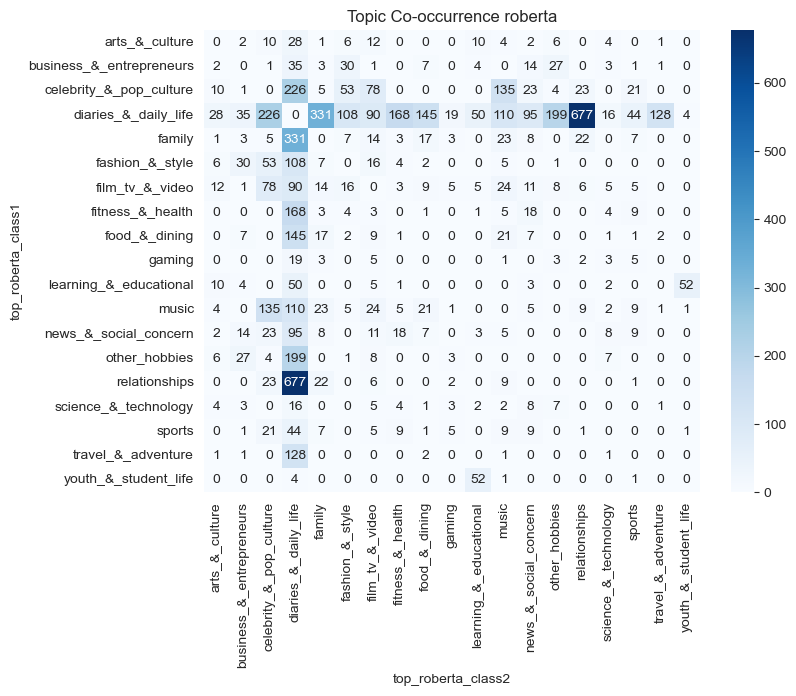

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
dual_topic_df = pd.read_csv('unfiltered_analyzed_csv.csv')
dual_topic_df = dual_topic_df.dropna(subset=['top_roberta_class2'])

co_ocurrence = pd.crosstab(dual_topic_df['top_roberta_class1'], dual_topic_df['top_roberta_class2'])
co_ocurrence = co_ocurrence.add(co_ocurrence.T, fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(co_ocurrence, annot=True, cmap='Blues', fmt='.0f')
plt.title('Topic Co-occurrence roberta')
plt.show()